## Importing Libraries and Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data 

cars = pd.read_csv('cars_ds_final.csv',index_col=0)
cars.head().T

,0,1,2,3,4
Make,Tata,Tata,Tata,Tata,Tata
Model,Nano Genx,Nano Genx,Nano Genx,Nano Genx,Nano Genx
Variant,Xt,Xe,Emax Xm,Xta,Xm
Ex-Showroom_Price,"Rs. 2,92,667","Rs. 2,36,447","Rs. 2,96,661","Rs. 3,34,768","Rs. 2,72,223"
Displacement,624 cc,624 cc,624 cc,624 cc,624 cc
...,...,...,...,...,...
USB_Ports,NaN,NaN,NaN,NaN,NaN
Heads-Up_Display,NaN,NaN,NaN,NaN,NaN
Welcome_Lights,NaN,NaN,NaN,NaN,NaN
Battery,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [3]:
cars["Multifunction_Steering_Wheel"].value_counts()
# It has multiple values with similar conotation

Multifunction_Steering_Wheel
Multifunction Steering Wheel                             719
Yes                                                      118
Multifunction Steering Wheel, With gear shift paddles     74
With gear shift paddles, Multifunction Steering Wheel      9
With gear shift paddles                                    5
Name: count, dtype: int64

In [4]:
# Adjustment for better analysis
cars["Multifunction_Steering_Wheel"][cars["Multifunction_Steering_Wheel"] == "Yes"]="Multifunction Steering Wheel"

In [5]:
print(cars.columns.to_list())

['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm', 'Engine_Location', 'Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Length', 'Width', 'Body_Type', 'Doors', 'City_Mileage', 'Highway_Mileage', 'ARAI_Certified_Mileage', 'ARAI_Certified_Mileage_for_CNG', 'Kerb_Weight', 'Gears', 'Ground_Clearance', 'Front_Brakes', 'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension', 'Front_Track', 'Rear_Track', 'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Power_Steering', 'Power_Windows', 'Power_Seats', 'Keyless_Entry', 'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Seating_Capacity', 'Seats_Material', 'Type', 'Wheelbase', 'Wheels_Size', 'Start_/_Stop_Button', '12v_Power_Outlet', 'Audiosystem', 'Aux-in_Compatibility', 'Average_Fuel_Consumption', 'Basic_Warranty', 'Bluetooth', 'Boot-lid_Opener', 'Boot_Space', 'CD_/_MP3_/_DVD_Player', 'Central_Locking', 'Child_Safet

In [6]:
# List of features to drop based on the earlier analysis
features_to_drop = [
    'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Cylinder_Configuration', 
    'Fuel_Tank_Capacity', 'Fuel_System', 'Fuel_Gauge', 
    'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Handbrake', 
    'Cigarette_Lighter', 'CD_/_MP3_/_DVD_Player', 'FM_Radio', 
    'ARAI_Certified_Mileage_for_CNG', 'Fuel_Type', 'Engine_Location',
    'Emission_Norm', 'Fuel_System', 'Compression_Ratio', 
    'Recommended_Tyre_Pressure', 'Rain_Sensing_Wipers',
    'Cooled_Glove_Box', 'iPod_Compatibility', 'Walk_Away_Auto_Car_Lock',
    'Engine_Malfunction_Light', 'Lane_Watch_Camera/_Side_Mirror_Camera',
    'Ambient_Lightning', 'Welcome_Lights', 'Heated_Seats', 
    'Engine_Type', 'Turbocharger'
]

# Drop the unnecessary features
cars1 = cars.drop(columns=features_to_drop)

cars1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Columns: 108 entries, Make to Electric_Range
dtypes: float64(4), object(104)
memory usage: 1.1+ MB


In [7]:
cat_col = [c for c in cars1.columns if cars[c].dtype == 'object' ] # Categorical columns as of now
num_col = [c for c in cars1.columns if cars[c].dtype != 'object' ] # Numerical columns as of now

print(f"cat_col : {cat_col} \nnum_col : {num_col}")

cat_col : ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Drivetrain', 'Height', 'Length', 'Width', 'Body_Type', 'City_Mileage', 'Highway_Mileage', 'ARAI_Certified_Mileage', 'Kerb_Weight', 'Gears', 'Ground_Clearance', 'Front_Brakes', 'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension', 'Front_Track', 'Rear_Track', 'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Power_Steering', 'Power_Windows', 'Power_Seats', 'Keyless_Entry', 'Power', 'Torque', 'Seats_Material', 'Type', 'Wheelbase', 'Wheels_Size', 'Start_/_Stop_Button', '12v_Power_Outlet', 'Audiosystem', 'Aux-in_Compatibility', 'Average_Fuel_Consumption', 'Basic_Warranty', 'Bluetooth', 'Boot-lid_Opener', 'Boot_Space', 'Central_Locking', 'Child_Safety_Locks', 'Clock', 'Cup_Holders', 'Distance_to_Empty', 'Door_Pockets', 'Extended_Warranty', 'Fuel-lid_Opener', 'Instrument_Console', 'Low_Fuel_Warning', 'Minimum_Turning_Radius', 'Multifunction_Display', 'Sun_Visor', 'Third_Row_AC_Vents', 'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'H

In [8]:
# Updated lists after removing irrelevant features

num_potential = [
    "Ex-Showroom_Price", "Height", "Length", "Width", "City_Mileage", 
    "Highway_Mileage", "ARAI_Certified_Mileage", "Kerb_Weight", "Gears", 
    "Ground_Clearance", "Wheelbase", "Boot_Space", "Minimum_Turning_Radius", 
    "Gross_Vehicle_Weight"
]

lbl_potential = [
    "Drivetrain", "Front_Brakes", "Rear_Brakes", "Power_Steering", 
    "Power_Windows", "Power_Seats", "Keyless_Entry", "Seats_Material", 
    "Type", "Start_/_Stop_Button", "12v_Power_Outlet", "Audiosystem", 
    "Aux-in_Compatibility", "Bluetooth", "Central_Locking", 
    "Child_Safety_Locks", "Clock", "Cup_Holders", "Distance_to_Empty", 
    "Door_Pockets", "Instrument_Console", "Low_Fuel_Warning", 
    "Multifunction_Display", "Sun_Visor", "Third_Row_AC_Vents", 
    "Ventilation_System", "Auto-Dimming_Rear-View_Mirror", "Hill_Assist", 
    "Gear_Indicator", "Drive_Modes", "Engine_Immobilizer", 
    "High_Speed_Alert_System", "Seat_Back_Pockets", 
    "ABS_(Anti-lock_Braking_System)", "Headlight_Reminder", 
    "Adjustable_Headrests", "Door_Ajar_Warning", 
    "EBD_(Electronic_Brake-force_Distribution)", 
    "Fasten_Seat_Belt_Warning", "Gear_Shift_Reminder", 
    "Adjustable_Steering_Column", "Key_Off_Reminder", 
    "USB_Compatibility", "Infotainment_Screen", 
    "Multifunction_Steering_Wheel", "Seat_Height_Adjustment"
]

# Print the length of updated lists
print("Num_Potential :", len(num_potential), "\nLbl_Potential :", len(lbl_potential))


Num_Potential : 14 
Lbl_Potential : 46


In [9]:
# Potential Numerical Data
cars1[num_potential]

,Ex-Showroom_Price,Height,Length,Width,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Wheelbase,Boot_Space,Minimum_Turning_Radius,Gross_Vehicle_Weight
0,"Rs. 2,92,667",1652 mm,3164 mm,1750 mm,?23.6 km/litre,NaN,23.6 km/litre,660 kg,4,180 mm,2230 mm,110 litres,4 meter,NaN
1,"Rs. 2,36,447",1652 mm,3164 mm,1750 mm,?23.6 km/litre,NaN,23.6 km/litre,725 kg,4,180 mm,2230 mm,110 litres,4 meter,NaN
2,"Rs. 2,96,661",1652 mm,3164 mm,1750 mm,NaN,NaN,NaN,710 kg,4,180 mm,2230 mm,110 litres,4 meter,NaN
3,"Rs. 3,34,768",1652 mm,3164 mm,1750 mm,?23.6 km/litre,NaN,21.9 km/litre,725 kg,5,180 mm,2230 mm,94 litres,4 meter,NaN
4,"Rs. 2,72,223",1652 mm,3164 mm,1750 mm,?23.6 km/litre,NaN,23.6 km/litre,725 kg,4,180 mm,2230 mm,110 litres,4 meter,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,"Rs. 13,02,000",1495 mm,4440 mm,1695 mm,22.6 km/litre,25.1 km/litre,25.1 km/litre,1170 kg,6,165 mm,2600 mm,510 litres,5.3 meter,1545 kg
1272,"Rs. 14,21,000",1495 mm,4440 mm,1695 mm,22.6 km/litre,25.1 km/litre,25.1 km/litre,1175 kg,6,165 mm,2600 mm,510 litres,5.3 meter,1550 kg
1273,"Rs. 14,31,000",1495 mm,4440 mm,1695 mm,18 km/litre,18 km/litre,22.6 km/litre,1107 kg,5,165 mm,2600 mm,510 litres,5.3 meter,1482 kg
1274,"Rs. 12,01,000",1495 mm,4440 mm,1695 mm,14.3 km/litre,16.4 km/litre,17.8 km/litre,1080 kg,5,165 mm,2600 mm,510 litres,5.3 meter,1455 kg


### Feature Transformation

In [10]:
df = cars1.copy()
# Apply the function to each element in the DataFrame
def extract_first_number(x):
    # Find all number components (floats or integers)
    numbers = re.findall(r'\d+\.\d+|\d+', str(x))
    
    # Return the first number found, if available, else NaN
    return float(numbers[0]) if numbers else np.nan

# Apply to the 'num_potential' columns
df[num_potential] = cars1[num_potential].applymap(extract_first_number)
df[num_potential].head()


,Ex-Showroom_Price,Height,Length,Width,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Wheelbase,Boot_Space,Minimum_Turning_Radius,Gross_Vehicle_Weight
0,2.0,1652.0,3164.0,1750.0,23.6,NaN,23.6,660.0,4.0,180.0,2230.0,110.0,4.0,NaN
1,2.0,1652.0,3164.0,1750.0,23.6,NaN,23.6,725.0,4.0,180.0,2230.0,110.0,4.0,NaN
2,2.0,1652.0,3164.0,1750.0,NaN,NaN,NaN,710.0,4.0,180.0,2230.0,110.0,4.0,NaN
3,3.0,1652.0,3164.0,1750.0,23.6,NaN,21.9,725.0,5.0,180.0,2230.0,94.0,4.0,NaN
4,2.0,1652.0,3164.0,1750.0,23.6,NaN,23.6,725.0,4.0,180.0,2230.0,110.0,4.0,NaN


In [11]:
# Updating the Numerical Data
num_col1 = [c for c in df.columns if df[c].dtype != 'object' ]
df[num_col1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ex-Showroom_Price       1276 non-null   float64
 1   Height                  1275 non-null   float64
 2   Length                  1276 non-null   float64
 3   Width                   1264 non-null   float64
 4   Doors                   1272 non-null   float64
 5   City_Mileage            721 non-null    float64
 6   Highway_Mileage         476 non-null    float64
 7   ARAI_Certified_Mileage  1162 non-null   float64
 8   Kerb_Weight             911 non-null    float64
 9   Gears                   1170 non-null   float64
 10  Ground_Clearance        987 non-null    float64
 11  Seating_Capacity        1270 non-null   float64
 12  Wheelbase               1256 non-null   float64
 13  Boot_Space              1027 non-null   float64
 14  Minimum_Turning_Radius  895 non-null    float

In [12]:
num_df = df[num_col1]

temp_ft = num_df.count()[num_df.count()>800].index.to_list() # Removing Features having less than 800 values
num_df = df[temp_ft]
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ex-Showroom_Price       1276 non-null   float64
 1   Height                  1275 non-null   float64
 2   Length                  1276 non-null   float64
 3   Width                   1264 non-null   float64
 4   Doors                   1272 non-null   float64
 5   ARAI_Certified_Mileage  1162 non-null   float64
 6   Kerb_Weight             911 non-null    float64
 7   Gears                   1170 non-null   float64
 8   Ground_Clearance        987 non-null    float64
 9   Seating_Capacity        1270 non-null   float64
 10  Wheelbase               1256 non-null   float64
 11  Boot_Space              1027 non-null   float64
 12  Minimum_Turning_Radius  895 non-null    float64
 13  Number_of_Airbags       1141 non-null   float64
dtypes: float64(14)
memory usage: 149.5 KB


In [13]:
describe = df.describe(include='object').T
describe = describe[describe["count"] >= 800]
yes_col = describe[describe['top'] == "Yes"].index.to_list()
yes_col

['12v_Power_Outlet',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Bluetooth',
 'Central_Locking',
 'Child_Safety_Locks',
 'Distance_to_Empty',
 'Low_Fuel_Warning',
 'Multifunction_Display',
 'Engine_Immobilizer',
 'Seat_Back_Pockets',
 'ABS_(Anti-lock_Braking_System)',
 'Headlight_Reminder',
 'Door_Ajar_Warning',
 'EBD_(Electronic_Brake-force_Distribution)',
 'Fasten_Seat_Belt_Warning',
 'Key_Off_Reminder',
 'USB_Compatibility']

In [14]:
yes_df = df[yes_col]
for c in yes_col:
    yes_df[c] = df[c].isin(df[c].unique()).astype(int)
yes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   12v_Power_Outlet                           1276 non-null   int32
 1   Aux-in_Compatibility                       1276 non-null   int32
 2   Average_Fuel_Consumption                   1276 non-null   int32
 3   Bluetooth                                  1276 non-null   int32
 4   Central_Locking                            1276 non-null   int32
 5   Child_Safety_Locks                         1276 non-null   int32
 6   Distance_to_Empty                          1276 non-null   int32
 7   Low_Fuel_Warning                           1276 non-null   int32
 8   Multifunction_Display                      1276 non-null   int32
 9   Engine_Immobilizer                         1276 non-null   int32
 10  Seat_Back_Pockets                          1276 non-n

In [15]:
unique_dict = {}
for c in cars.columns:
    unique_dict[c] = [cars[c].unique()]  # Store unique values as lists

# Convert the dictionary into a DataFrame
df_unique = pd.DataFrame.from_dict(unique_dict, orient='index', columns=["Unique Values"])
describe = pd.merge(describe, df_unique, left_index=True, right_index=True, how='inner')
describe

,count,unique,top,freq,Unique Values
Make,1201,39,Maruti Suzuki,149,"[Tata, Datsun, Renault, Maruti Suzuki, Hyundai..."
Model,1276,263,Nexon,24,"[Nano Genx, Redi-Go, Kwid, Eeco, Alto K10, Go,..."
Variant,1276,1064,Lxi,9,"[Xt, Xe, Emax Xm, Xta, Xm, Xma, D, T, A, S, 1...."
Drivetrain,1269,4,FWD (Front Wheel Drive),887,"[RWD (Rear Wheel Drive), FWD (Front Wheel Driv..."
Body_Type,1270,17,SUV,447,"[Hatchback, MPV, MUV, SUV, Sedan, Crossover, n..."
Front_Brakes,1251,3,Ventilated Disc,1167,"[Drum, Ventilated Disc, nan, Solid Disc]"
Rear_Brakes,1251,3,Drum,782,"[Drum, nan, Ventilated Disc, Solid Disc]"
Front_Suspension,1217,140,MacPherson Strut,119,"[Independent, Lower Wishbone, McPherson Strut ..."
Rear_Suspension,1230,173,Torsion Beam,123,"[Independent, Semi Trailing arm with coil spri..."
Front_Tyre_&_Rim,1227,234,185/60R15,66,"[135/70R12, 80/155R13, 155/80R13, 165/70 R14, ..."


In [16]:
imp_cat_cols = ["Drivetrain", "Power_Steering","Keyless_Entry","Infotainment_Screen","Multifunction_Steering_Wheel",
    "Parking_Assistance","Seats_Material","Type","Audiosystem","Instrument_Console",
    "Seat_Height_Adjustment","Adjustable_Steering_Column"]

In [17]:
cat_df = df[imp_cat_cols].copy()  # Create a copy of the relevant columns
le = LabelEncoder()  # Initialize the LabelEncoder
class_dict = {}
for c in imp_cat_cols:
    # Initialize the LabelEncoder for each column
    le = LabelEncoder()
    
    # Temporarily fill NaN values with a placeholder (e.g., 'Unknown')
    cat_df[c] = df[c].fillna('Unknown')
    
    # Fit and transform the data for the column
    cat_df[c] = le.fit_transform(cat_df[c])
    
    # Create a dictionary mapping the class names to the encoded values
    class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

    class_dict[c] = class_mapping
    
    # Print the column name and the class to encoded value mapping
    print(f"Column: {c}")
    print(f"Class to Encoded Value Mapping: {class_mapping}\n")

    cat_df = cat_df.where(df.notna(),np.nan)

# Display the resulting DataFrame
cat_df.info()

Column: Drivetrain
Class to Encoded Value Mapping: {'4WD': 0, 'AWD (All Wheel Drive)': 1, 'FWD (Front Wheel Drive)': 2, 'RWD (Rear Wheel Drive)': 3, 'Unknown': 4}

Column: Power_Steering
Class to Encoded Value Mapping: {'Electric Power': 0, 'Electric Power, Hydraulic Power': 1, 'Electro-Hydraulic': 2, 'Hydraulic Power': 3, 'Unknown': 4, 'Yes': 5}

Column: Keyless_Entry
Class to Encoded Value Mapping: {'Remote': 0, 'Remote, Smart Key': 1, 'Smart Key': 2, 'Smart Key, Remote': 3, 'Unknown': 4, 'Yes': 5}

Column: Infotainment_Screen
Class to Encoded Value Mapping: {'Touch Sensitive': 0, 'Unknown': 1, 'Yes': 2}

Column: Multifunction_Steering_Wheel
Class to Encoded Value Mapping: {'Multifunction Steering Wheel': 0, 'Multifunction Steering Wheel, With gear shift paddles': 1, 'Unknown': 2, 'With gear shift paddles': 3, 'With gear shift paddles, Multifunction Steering Wheel': 4}

Column: Parking_Assistance
Class to Encoded Value Mapping: {'Front & rear sensors with 360 degree view': 0, 'Front 

### Outlier Treatment

In [18]:
# Calculate the 1st and 99th percentile for each column
lower_cap = num_df.quantile(0.01)
upper_cap = num_df.quantile(0.99)

# Use apply to clip the values in each column
df_capped = num_df.apply(lambda x: x.clip(lower=lower_cap[x.name], upper=upper_cap[x.name]))

# Display the capped dataframe
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ex-Showroom_Price       1276 non-null   float64
 1   Height                  1275 non-null   float64
 2   Length                  1276 non-null   float64
 3   Width                   1264 non-null   float64
 4   Doors                   1272 non-null   float64
 5   ARAI_Certified_Mileage  1162 non-null   float64
 6   Kerb_Weight             911 non-null    float64
 7   Gears                   1170 non-null   float64
 8   Ground_Clearance        987 non-null    float64
 9   Seating_Capacity        1270 non-null   float64
 10  Wheelbase               1256 non-null   float64
 11  Boot_Space              1027 non-null   float64
 12  Minimum_Turning_Radius  895 non-null    float64
 13  Number_of_Airbags       1141 non-null   float64
dtypes: float64(14)
memory usage: 149.5 KB


### Feature Scaling

In [19]:
scaler = StandardScaler()
num_df_scaled = df_capped.copy()
for f in df_capped.columns:
    num_df_scaled[f]=scaler.fit_transform(df_capped[[f]])

# Show the scaled data
print("Scaled DataFrame:")
num_df_scaled.info()

Scaled DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ex-Showroom_Price       1276 non-null   float64
 1   Height                  1275 non-null   float64
 2   Length                  1276 non-null   float64
 3   Width                   1264 non-null   float64
 4   Doors                   1272 non-null   float64
 5   ARAI_Certified_Mileage  1162 non-null   float64
 6   Kerb_Weight             911 non-null    float64
 7   Gears                   1170 non-null   float64
 8   Ground_Clearance        987 non-null    float64
 9   Seating_Capacity        1270 non-null   float64
 10  Wheelbase               1256 non-null   float64
 11  Boot_Space              1027 non-null   float64
 12  Minimum_Turning_Radius  895 non-null    float64
 13  Number_of_Airbags       1141 non-null   float64
dtypes: float64(14)
memory usage

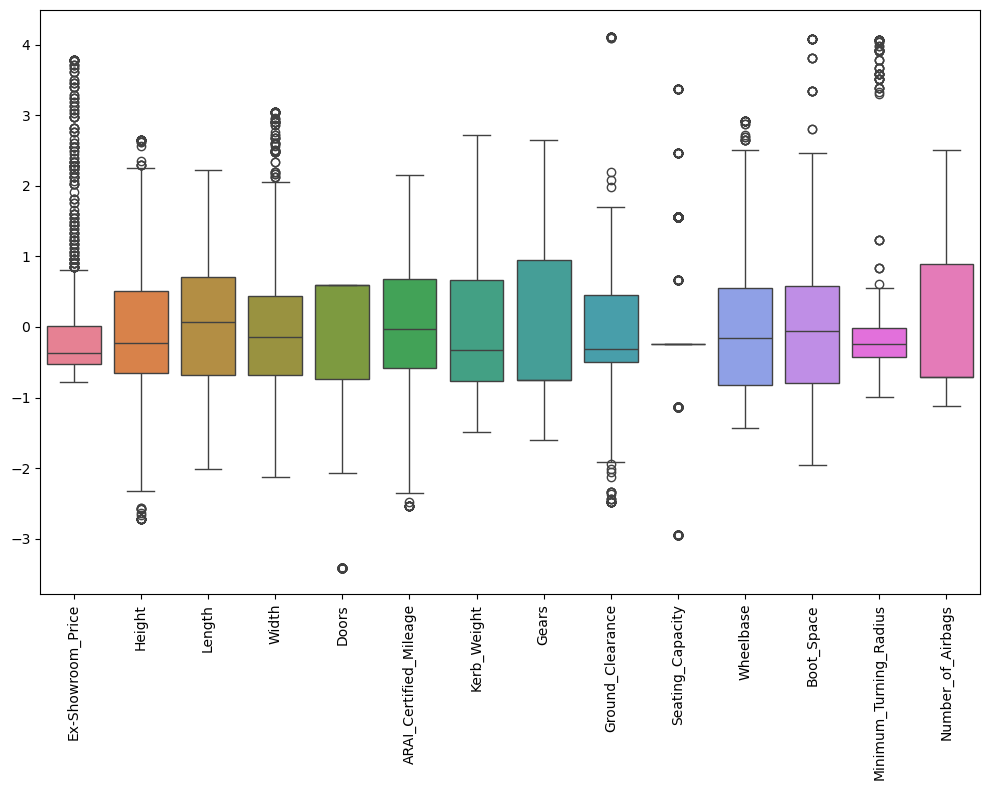

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(num_df_scaled)
plt.xticks(rotation=90)
plt.tight_layout()

In [21]:
# Concatenate the dataframes along the columns (axis=1) using the index of num_df_scaled
temp_df = pd.concat([num_df_scaled, yes_df.loc[num_df_scaled.index], cat_df.loc[num_df_scaled.index]], axis=1)

# Display the info of the resulting dataframe
temp_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Ex-Showroom_Price                          1276 non-null   float64
 1   Height                                     1275 non-null   float64
 2   Length                                     1276 non-null   float64
 3   Width                                      1264 non-null   float64
 4   Doors                                      1272 non-null   float64
 5   ARAI_Certified_Mileage                     1162 non-null   float64
 6   Kerb_Weight                                911 non-null    float64
 7   Gears                                      1170 non-null   float64
 8   Ground_Clearance                           987 non-null    float64
 9   Seating_Capacity                           1270 non-null   float64
 10  Wheelbase                    

### Data Imputation

In [22]:
data = temp_df.copy()
imputer_cat = SimpleImputer(strategy='most_frequent')
for c in cat_df.columns:
    if c in data.columns:
        data[c] = imputer_cat.fit_transform(data[[c]]).flatten()
    else:
        continue

imputer_num = SimpleImputer(strategy='median')
for c in num_df_scaled.columns:
    data[c] = imputer_num.fit_transform(data[[c]]).flatten()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ex-Showroom_Price,1276.0,2.227407e-17,1.000392,-0.785862,-0.521020,-0.362114,0.008666,3.782673
Height,1276.0,-1.830780e-04,1.000021,-2.722682,-0.655139,-0.233607,0.507472,2.653746
Length,1276.0,4.009332e-16,1.000392,-2.013871,-0.683686,0.070939,0.713788,2.224149
Width,1276.0,-1.347185e-03,0.995773,-2.126247,-0.653164,-0.143251,0.426861,3.043707
Doors,1276.0,1.885794e-03,0.999389,-3.411691,-0.736185,0.601568,0.601568,0.601568
ARAI_Certified_Mileage,1276.0,-2.039577e-03,0.954681,-2.538228,-0.490606,-0.022829,0.585921,2.157992
Kerb_Weight,1276.0,-9.525979e-02,0.858590,-1.488819,-0.592865,-0.333018,0.367531,2.719255
Gears,1276.0,-6.204970e-02,0.979886,-1.595401,-0.746938,-0.746938,0.101526,2.646916
Ground_Clearance,1276.0,-7.215534e-02,0.889895,-2.478779,-0.495242,-0.318582,0.317394,4.115581
Seating_Capacity,1276.0,-1.121357e-03,0.998171,-2.942614,-0.238475,-0.238475,-0.238475,3.367043


## Exploratory Data Analysis

<Axes: >

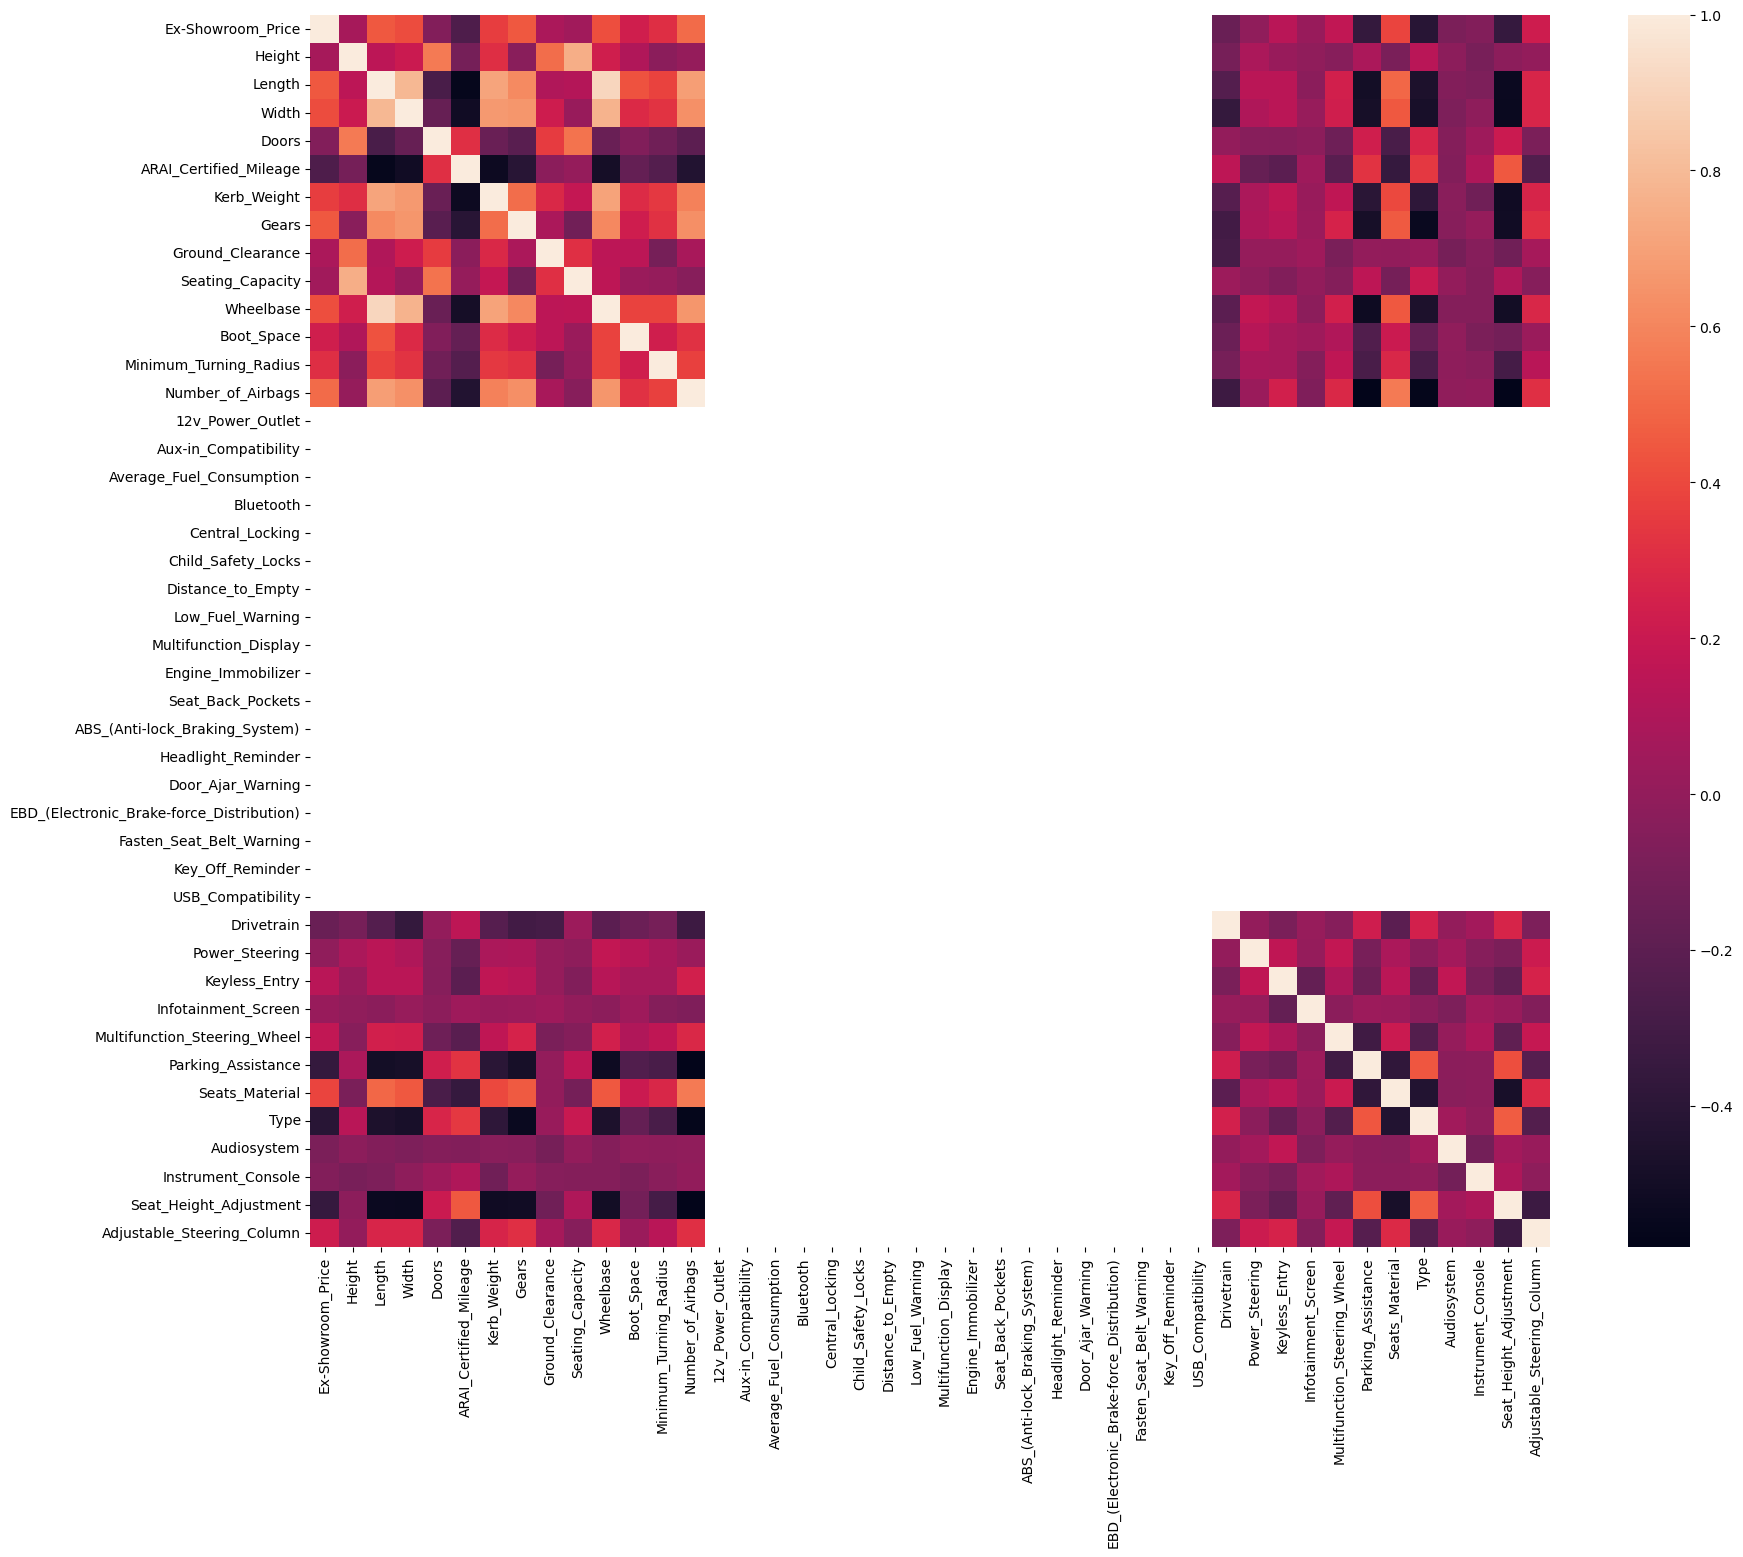

In [23]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr())
# The data shows various features that have 100% Correlation

<Axes: >

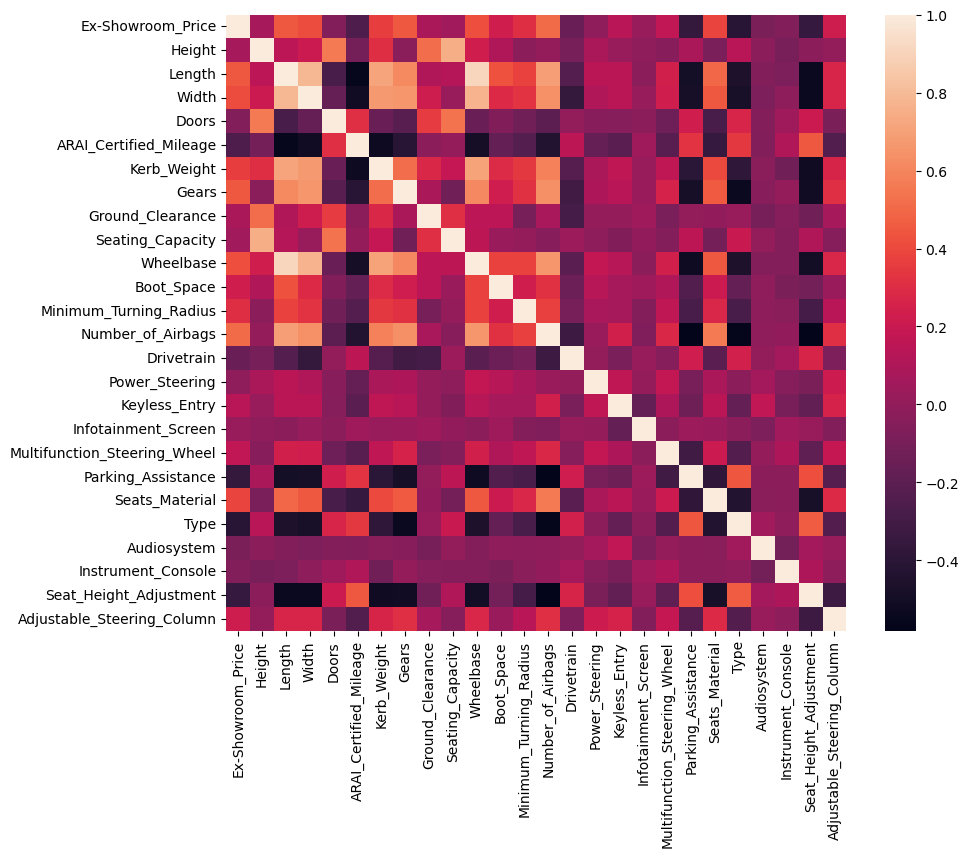

In [24]:
# Removing Yes Features
plt.figure(figsize=(10,8))
sns.heatmap(data[[c for c in data.columns if c not in yes_col]].corr())

## Principal Component Analysis

In [25]:
# Initialize PCA and fit to the data
pca = PCA()
df_pca = pca.fit_transform(data)

# Get standard deviations (sqrt of the eigenvalues)
std_dev = np.round(np.sqrt(pca.explained_variance_),4)

# Get proportion of variance
prop_variance = np.round(pca.explained_variance_ratio_,4)

# Get cumulative proportion
cumulative_prop = np.round(np.cumsum(prop_variance),4)

# Create a DataFrame for summary
pca_summary = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': prop_variance,
    'Cumulative Proportion': cumulative_prop
})

# Set appropriate index labels for components
pca_summary.index = [f'PC{i+1}' for i in range(len(std_dev))]

print("Importance of components : \n",pca_summary)

Importance of components : 
       Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1               2.9658                  0.2949                 0.2949
PC2               2.1628                  0.1568                 0.4517
PC3               1.6909                  0.0959                 0.5476
PC4               1.4711                  0.0725                 0.6201
PC5               1.3751                  0.0634                 0.6835
PC6               1.2607                  0.0533                 0.7368
PC7               1.0749                  0.0387                 0.7755
PC8               0.9114                  0.0278                 0.8033
PC9               0.8692                  0.0253                 0.8286
PC10              0.8270                  0.0229                 0.8515
PC11              0.7537                  0.0190                 0.8705
PC12              0.7122                  0.0170                 0.8875
PC13              0.6350           

In [26]:
# Set the target variance threshold (e.g., 90%)
target_variance = 0.90

# Fit PCA for all components
pca = PCA()
pca.fit(data)

# Calculate the cumulative explained variance for each number of components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain the target variance
optimal_components = np.argmax(cumulative_variance >= target_variance) + 1  # +1 for actual number

print(f'Optimal number of principal components: {optimal_components}')

# Create an interactive plot using Plotly
fig = go.Figure()

# Add a line trace for the cumulative explained variance
fig.add_trace(go.Scatter(
    x=np.arange(1, len(cumulative_variance) + 1),
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative Explained Variance',
    line=dict(color='blue'),
    marker=dict(size=8, color='blue')
))

# Add a horizontal line for the target variance threshold
fig.add_trace(go.Scatter(
    x=[1, len(cumulative_variance)],
    y=[target_variance, target_variance],
    mode='lines',
    name=f'{target_variance * 100}% Target Variance',
    line=dict(color='red', dash='dash')
))

# Update layout for interactivity and readability
fig.update_layout(
    title='Cumulative Explained Variance by Principal Components',
    xaxis_title='Number of Principal Components',
    yaxis_title='Cumulative Explained Variance',
    xaxis=dict(tickmode='linear'),
    hovermode='x unified',
    template='plotly_white'
)

# Add annotations to show the optimal number of components
fig.add_annotation(
    x=optimal_components,
    y=cumulative_variance[optimal_components - 1],
    text=f"Optimal PCs: {optimal_components}",
    showarrow=True,
    arrowhead=2,
    ax=50,
    ay=-40
)

# Show interactive plot
fig.show()


Optimal number of principal components: 13


In [27]:
# Use the Optimal Components for PCA
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(data)

In [28]:
# Get factor loadings (component loadings)
factor_loadings = np.round(pca.components_.T,3)  # Transpose to match the original feature space

# Create a DataFrame for factor loadings
factor_loadings_df = pd.DataFrame(
    factor_loadings,
    index=data.columns,  # Features as index
    columns=[f'PC{i+1}' for i in range(factor_loadings.shape[1])]  # Principal components as columns
)
print("Rotation (n x k) = (52 X 52)")
print(factor_loadings_df)

Rotation (n x k) = (52 X 52)
                                             PC1    PC2    PC3    PC4    PC5  \
Ex-Showroom_Price                          0.190 -0.045  0.056 -0.089  0.109   
Height                                     0.002 -0.038  0.519 -0.118 -0.087   
Length                                     0.275 -0.031  0.157 -0.023  0.077   
Width                                      0.263 -0.043  0.150 -0.050  0.088   
Doors                                     -0.108 -0.048  0.343 -0.132 -0.138   
ARAI_Certified_Mileage                    -0.186 -0.036 -0.086 -0.070 -0.137   
Kerb_Weight                                0.200 -0.022  0.187 -0.054  0.076   
Gears                                      0.247 -0.019  0.010 -0.019  0.113   
Ground_Clearance                           0.025 -0.065  0.295 -0.101 -0.036   
Seating_Capacity                          -0.036 -0.030  0.463 -0.180 -0.084   
Wheelbase                                  0.270 -0.030  0.188 -0.032  0.022   
Boot_Space 

### EDA

Factor Loadings Shape: (44, 13)
Number of Features: 44


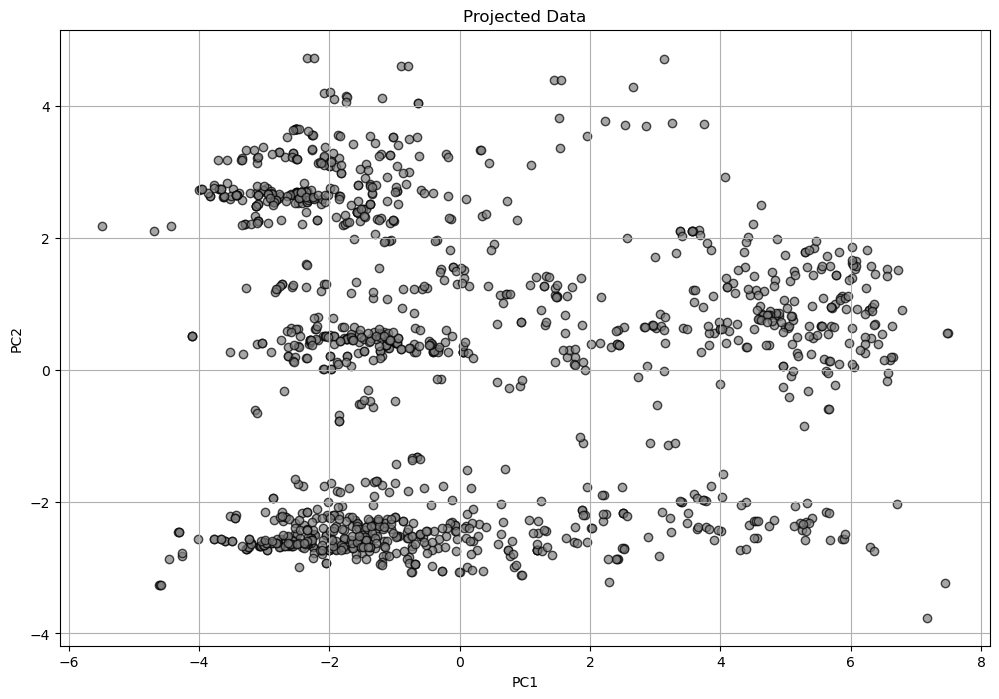

In [29]:
# Plotting the data 

plt.figure(figsize=(12, 8))
plt.scatter(df_pca[:,0], df_pca[:,1],c='grey', edgecolor='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Data')

# Get the factor loadings
factor_loadings = pca.components_.T  # Transpose to match feature space
features = data.columns

# Check dimensions
print("Factor Loadings Shape:", factor_loadings.shape)  # Should be (n_features, n_components)
print("Number of Features:", len(features))  # Should match number of rows in factor_loadings

# Optional: (As the features is alot, it has been omitted)
#for i in range(factor_loadings.shape[0]):
#    plt.arrow(0, 0, factor_loadings[i, 0] * 2, factor_loadings[i, 1] * 2,
#              color='red', head_width=0.1, head_length=0.1)
#    plt.text(factor_loadings[i, 0] * 2.5, factor_loadings[i, 1] * 2.5, features[i], color='red')

plt.grid()
plt.show()


## Segmentation
### Sum of Within cluster distances

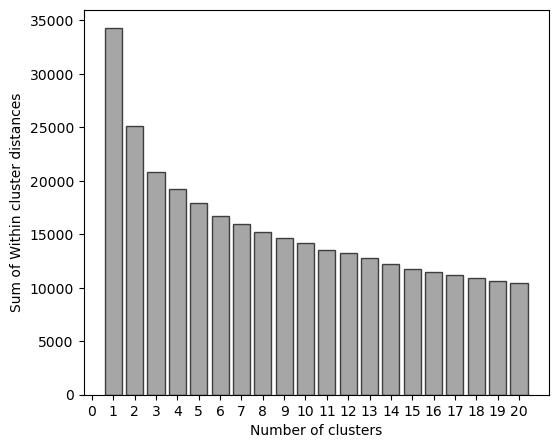

In [30]:
WCSS = []
for i in range(1,21):
    model = KMeans(n_clusters = i,n_init = 10,random_state=1234)
    model.fit(df_pca)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (6,5))
plt.bar(range(1,21),WCSS, linewidth=1,color='grey', edgecolor='k',alpha=0.7)
plt.xticks(np.arange(21))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Within cluster distances")
plt.show()

### Segment Stability Across Solutions

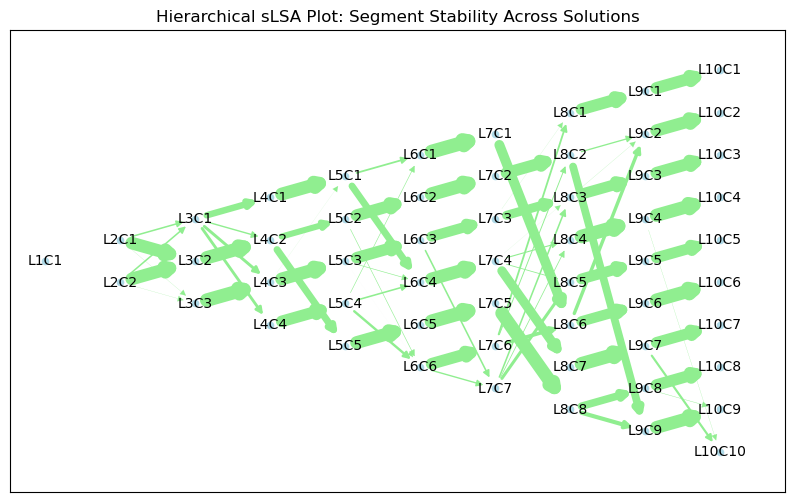

In [31]:
# List of k values (clusters) from 1 to 10
k_values = list(range(1, 11))

# Perform KMeans clustering for each k value
cluster_assignments = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    cluster_assignments.append(kmeans.labels_)

# Initialize a graph
G = nx.DiGraph()  # Directed graph to show hierarchical connections

# Add nodes for each solution (clusters for each k)
for level, k in enumerate(k_values):
    for cluster in range(k):
        G.add_node(f'L{level+1}C{cluster+1}', label=f'{cluster+1}', level=level)

# Add edges based on similarity (Adjusted Rand Index) between successive levels
for level in range(len(k_values) - 1):
    current_clusters = cluster_assignments[level]
    next_clusters = cluster_assignments[level + 1]

    # Loop through clusters in the current and next level and calculate ARI
    for cluster_current in np.unique(current_clusters):
        for cluster_next in np.unique(next_clusters):
            # Create a binary mask for the current and next clusters
            mask_current = (current_clusters == cluster_current)
            mask_next = (next_clusters == cluster_next)

            # Calculate Adjusted Rand Index between clusters
            ari = adjusted_rand_score(mask_current, mask_next)

            # Add an edge if ARI is positive
            if ari > 0:
                G.add_edge(f'L{level+1}C{cluster_current+1}', f'L{level+2}C{cluster_next+1}', weight=ari)

# Set node levels for layout
for node in G.nodes():
    G.nodes[node]['level'] = G.nodes[node]['level']  # This line ensures the level is set for each node
plt.figure(figsize=(10, 6))
# Plot the hierarchical network graph
pos = nx.multipartite_layout(G, subset_key='level')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=20)

# Draw edges with thickness proportional to ARI
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[10 * d['weight'] for (_, _, d) in edges], edge_color='lightgreen')

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Show edge labels (ARI values)
#edge_labels = {(i, j): f'{d["weight"]:.2f}' for i, j, d in edges}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set plot title
plt.title('Hierarchical sLSA Plot: Segment Stability Across Solutions')
plt.show()


### Silhouette Score

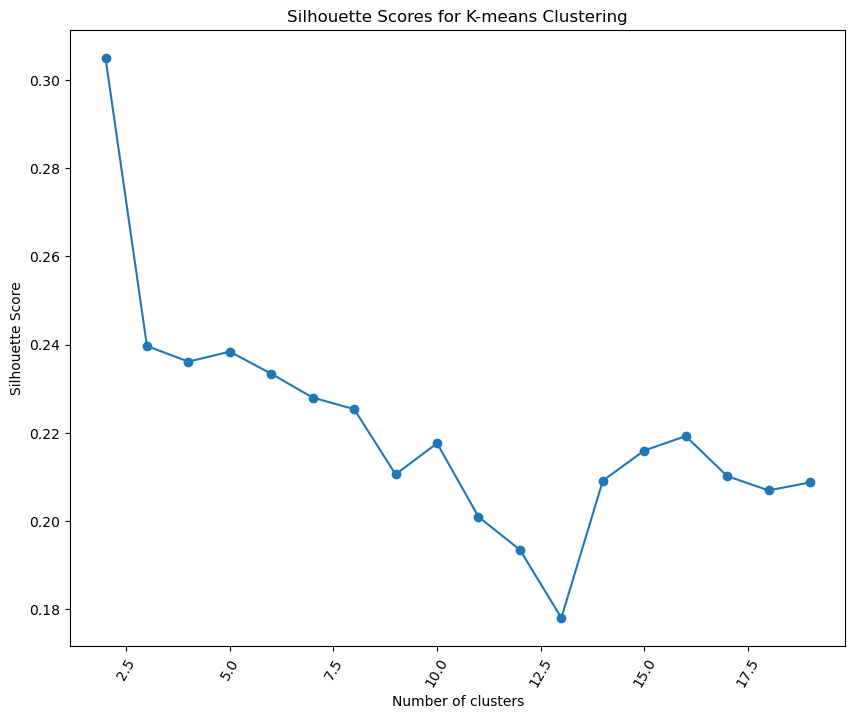

In [32]:
# K-means clustering from k=2 to k=20
results = []
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10).fit(df_pca)
    results.append(kmeans)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

# Plot silhouette scores (equivalent to AIC/BIC/ICL plot)
plt.figure(figsize=(10, 8))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-means Clustering')
plt.xticks(rotation=60)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Optimal No. of Clusters

In [33]:
# Find the elbow point
kl = KneeLocator(range(1, len(WCSS)+1), WCSS, curve='convex', direction='decreasing')
print(kl.elbow)


5


### Clustering of Features

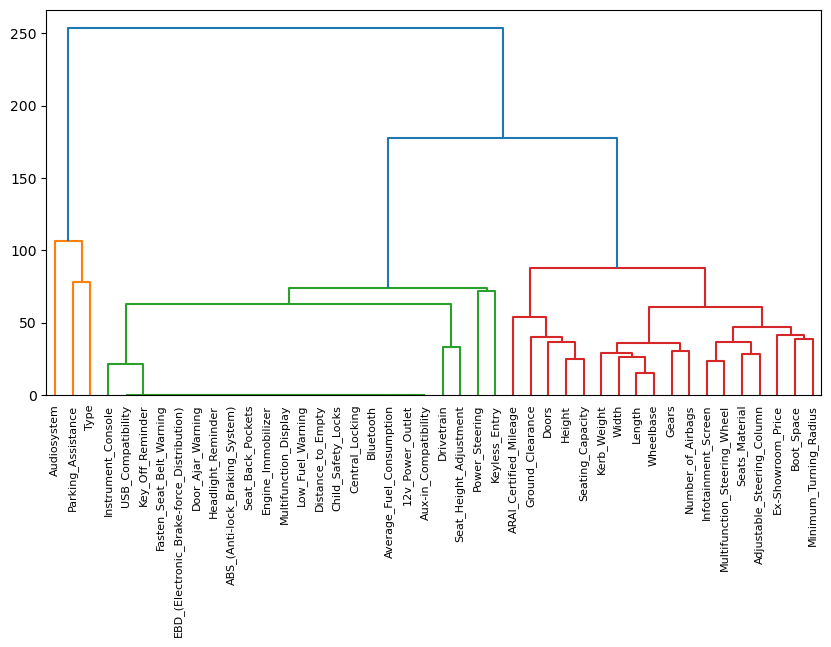

In [34]:
# Step 1: Hierarchical clustering
dist_matrix = pdist(data.T)
Z = linkage(dist_matrix, method='ward')

# Step 2: Plot a dendrogram
plt.figure(figsize=(10, 5))
dendro = dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=90)

# Extract the order of clustered variables
cluster_order = dendro['ivl']

# Show the plot
plt.show()


In [35]:
# Silhoette Score for the chosen number of clusters
silhouette_score(df_pca, kmeans.labels_)

0.2087058829332772

### EDA - Post Clustering

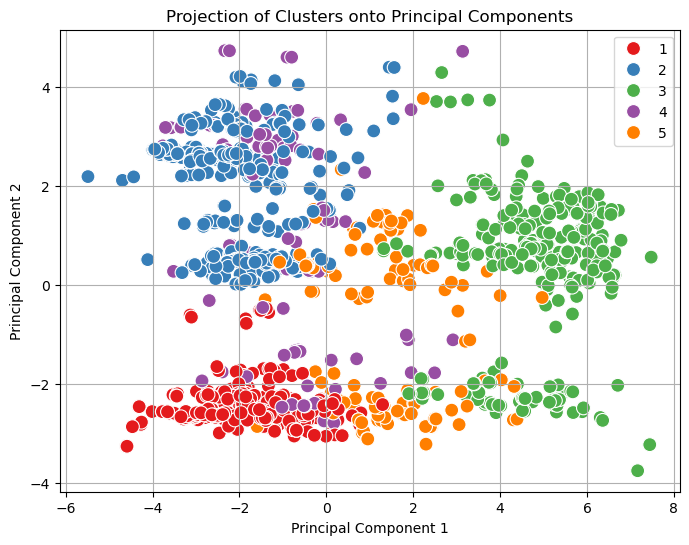

In [36]:
# Step 1: Perform KMeans clustering on the data
kmeans = KMeans(n_clusters=kl.elbow, n_init=10,init="k-means++")
kmeans.fit(df_pca)  # Fit KMeans to the original data
cluster_labels = kmeans.labels_ + 1  # Get the cluster labels and adjust to [1, 2, 3, 4]

# Step 3: Create a scatter plot of the projected data (first two principal components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels, palette='Set1', s=100)

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Clusters onto Principal Components')


# Show the plot
plt.grid(True)
plt.show()


In [37]:
# Non-standardized data for better interpretation
fnl_df = pd.concat([df_capped, yes_df.loc[df_capped.index], cat_df.loc[df_capped.index]], axis=1)
imputer_cat = SimpleImputer(strategy='most_frequent')
for c in cat_df.columns:
    if c in fnl_df.columns:
        fnl_df[c] = imputer_cat.fit_transform(fnl_df[[c]]).flatten()
    else:
        continue

imputer_num = SimpleImputer(strategy='median')
for c in df_capped.columns:
    fnl_df[c] = imputer_num.fit_transform(df_capped[[c]]).flatten()

fnl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ex-Showroom_Price,1276.0,15.836403,18.886538,1.0000,6.00,9.00,16.00,87.25
Height,1276.0,1591.332712,147.085930,1190.9000,1495.00,1557.00,1666.00,1981.68
Length,1276.0,4299.108738,449.737593,3393.7500,3991.75,4331.00,4620.00,5299.00
Width,1276.0,1790.036834,140.603627,1490.0000,1698.00,1770.00,1850.50,2220.00
Doors,1276.0,4.551724,0.747065,2.0000,4.00,5.00,5.00,5.00
ARAI_Certified_Mileage,1276.0,18.287330,4.469549,6.4136,16.00,18.19,21.04,28.40
Kerb_Weight,1276.0,1339.373824,413.025811,669.0000,1100.00,1225.00,1562.00,2693.30
Gears,1276.0,5.807210,1.154895,4.0000,5.00,5.00,6.00,9.00
Ground_Clearance,1276.0,176.974608,25.186664,108.8600,165.00,170.00,188.00,295.50
Seating_Capacity,1276.0,5.263323,1.107381,2.0000,5.00,5.00,5.00,9.00


In [38]:
# Adding `cluster` feature to the non standardized data
fnl_df["cluster"] = kmeans.labels_
fnl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Ex-Showroom_Price                          1276 non-null   float64
 1   Height                                     1276 non-null   float64
 2   Length                                     1276 non-null   float64
 3   Width                                      1276 non-null   float64
 4   Doors                                      1276 non-null   float64
 5   ARAI_Certified_Mileage                     1276 non-null   float64
 6   Kerb_Weight                                1276 non-null   float64
 7   Gears                                      1276 non-null   float64
 8   Ground_Clearance                           1276 non-null   float64
 9   Seating_Capacity                           1276 non-null   float64
 10  Wheelbase                    

<Axes: xlabel='cluster', ylabel='percent'>

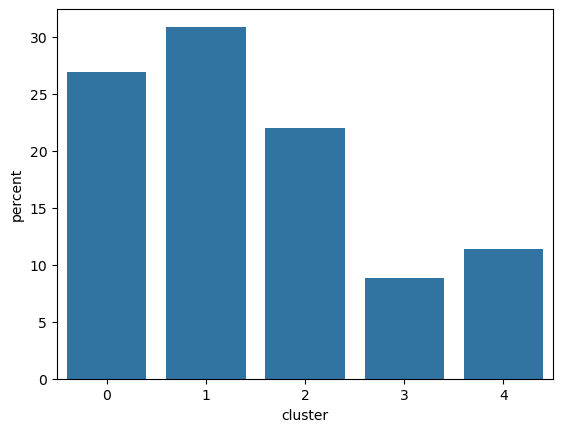

In [39]:
data['cluster'] = kmeans.predict(df_pca)
sns.countplot(x=data['cluster'],stat='percent')

## Classification of the Segments
### Train-Test Data

In [40]:
X,y = data.drop(["cluster"],axis=1),data["cluster"]
X,y

(      Ex-Showroom_Price    Height    Length     Width     Doors  \
 0             -0.732894  0.412287 -2.013871 -0.284893  0.601568   
 1             -0.732894  0.412287 -2.013871 -0.284893  0.601568   
 2             -0.732894  0.412287 -2.013871 -0.284893 -0.736185   
 3             -0.679925  0.412287 -2.013871 -0.284893  0.601568   
 4             -0.732894  0.412287 -2.013871 -0.284893  0.601568   
 ...                 ...       ...       ...       ...       ...   
 1271          -0.150240 -0.655139  0.313397 -0.674410 -0.736185   
 1272          -0.097272 -0.655139  0.313397 -0.674410 -0.736185   
 1273          -0.097272 -0.655139  0.313397 -0.674410 -0.736185   
 1274          -0.203209 -0.655139  0.313397 -0.674410 -0.736185   
 1275           2.763029  2.098413  1.336617  0.600373  0.601568   
 
       ARAI_Certified_Mileage  Kerb_Weight     Gears  Ground_Clearance  \
 0                   1.132729    -1.488819 -1.595401          0.034738   
 1                   1.132729    -

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape

((1020, 44), (256, 44))

### Feature Scaling

In [42]:
## scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [43]:
#using logisitc regression for classification 

clf = LogisticRegression()
clf.fit(X_train,y_train)

## predictions
preds = clf.predict(X_test)

In [44]:
## performmance of the model
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       0.99      0.97      0.98        79
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        23
           4       0.93      0.97      0.95        29

    accuracy                           0.99       256
   macro avg       0.98      0.99      0.99       256
weighted avg       0.99      0.99      0.99       256



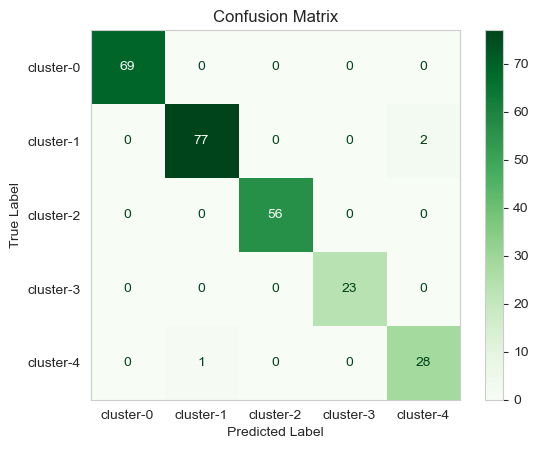

In [45]:
sns.set_style("whitegrid", {'axes.grid' : False})

cm = confusion_matrix(y_test,preds,labels=[i for i in range(0,kl.elbow)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[f"cluster-{i}" for i in range(0,kl.elbow)])
disp.plot(cmap='Greens',colorbar=True,)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('count12.png')
plt.show()

### Decision Tree

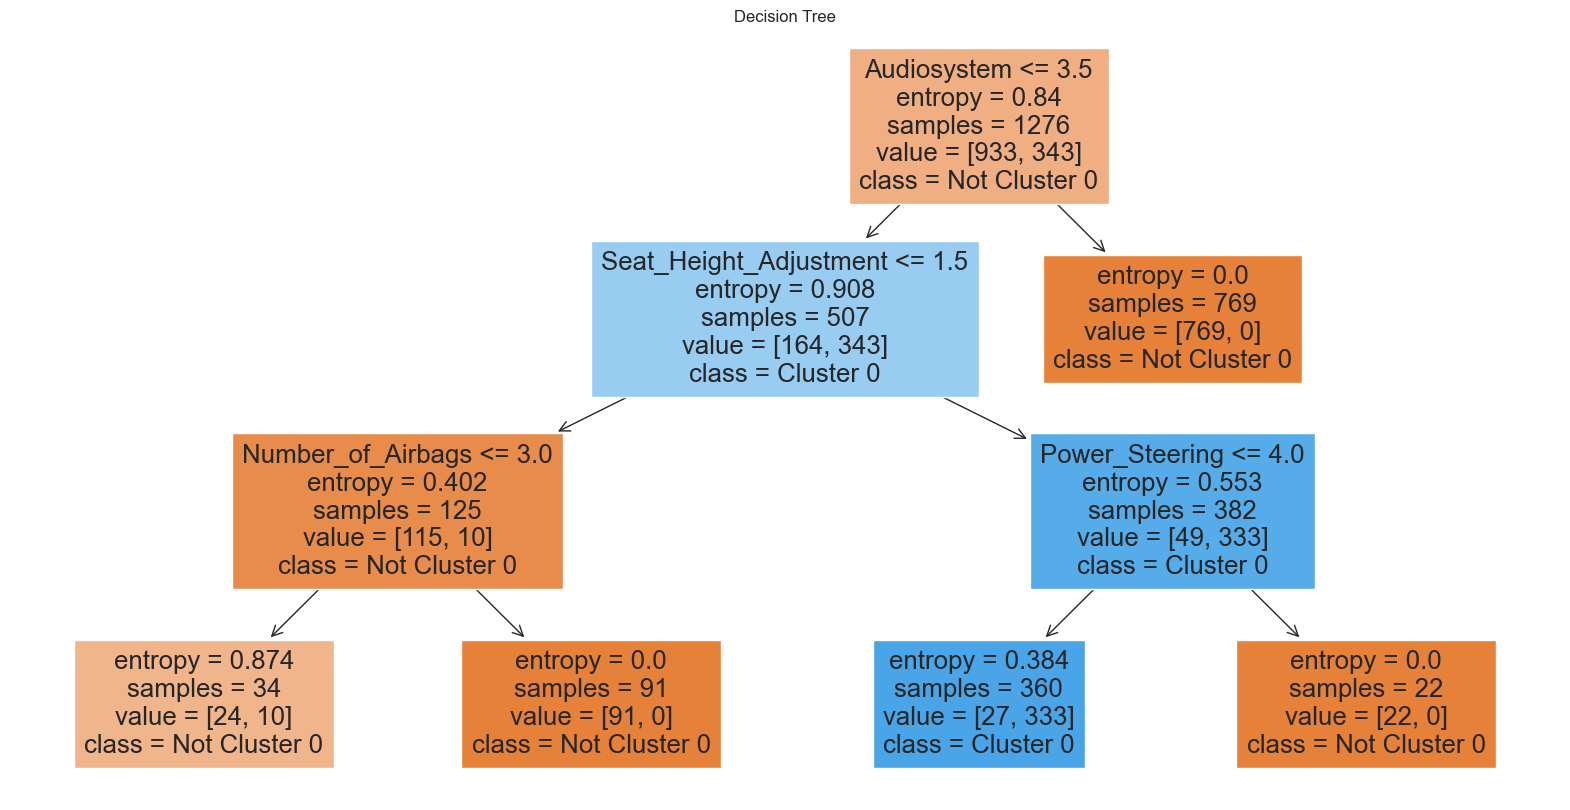

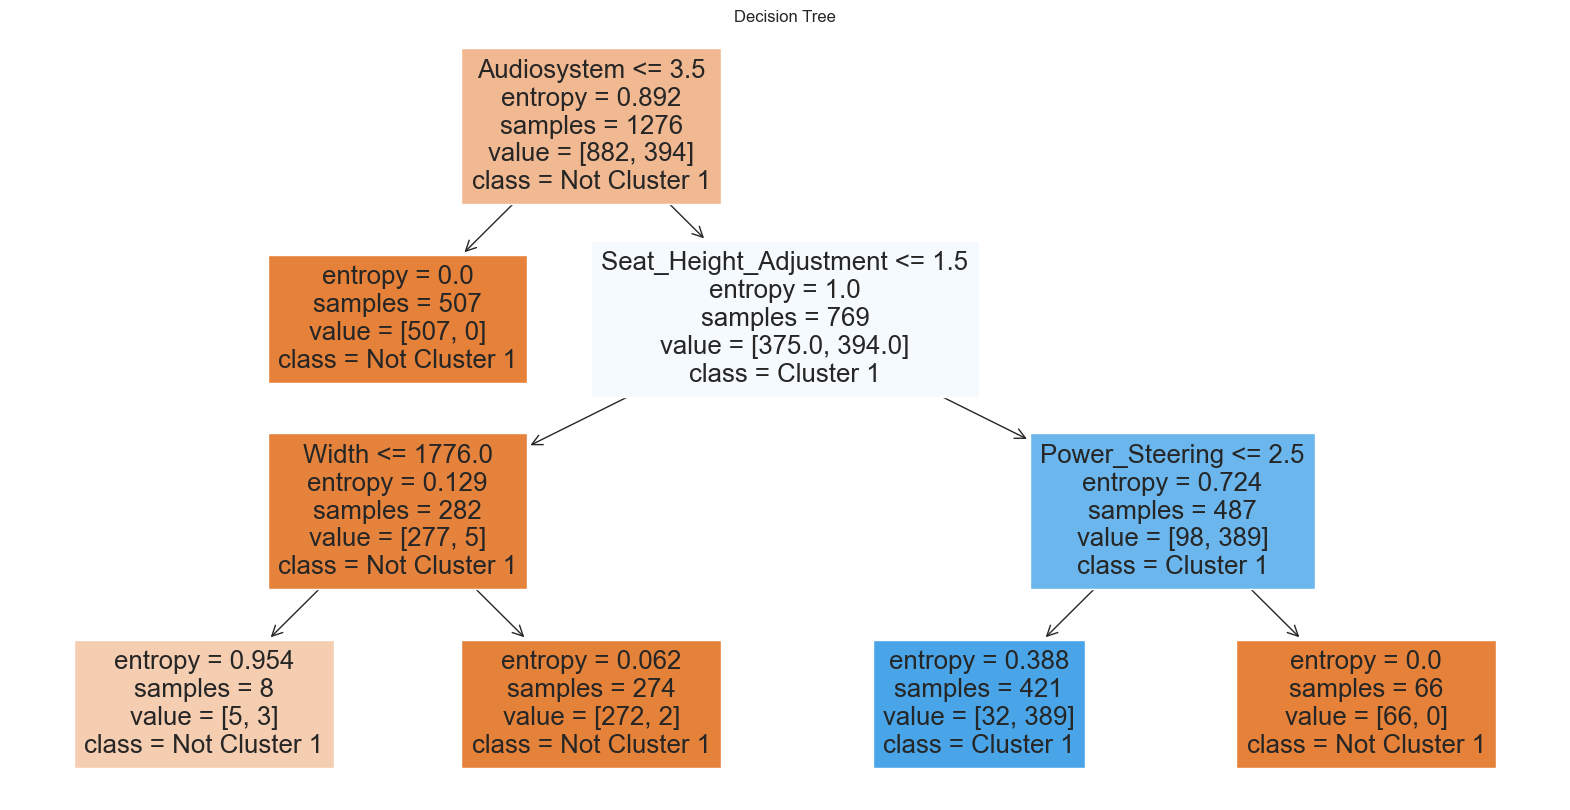

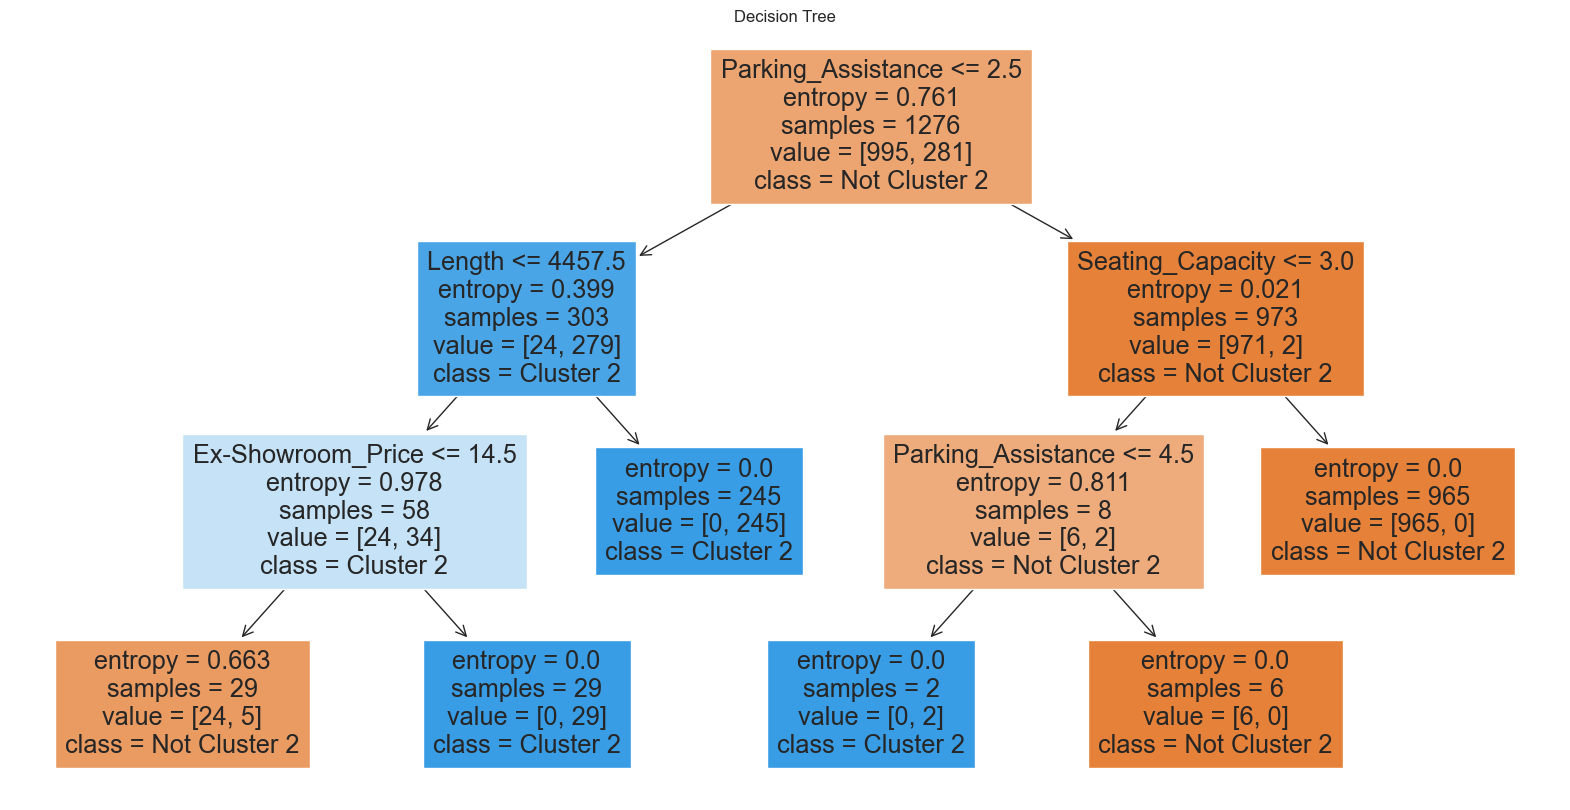

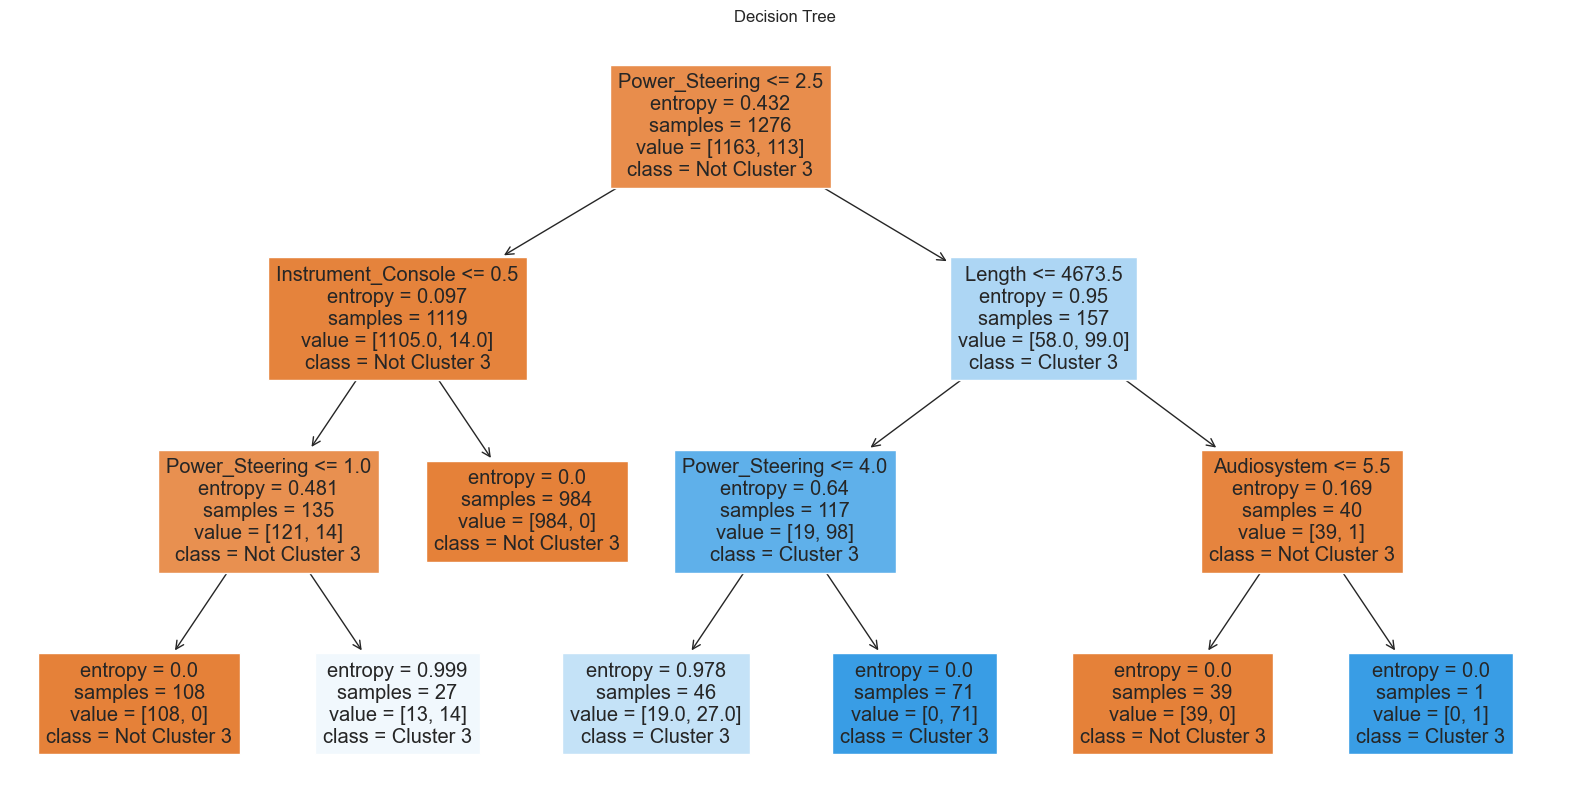

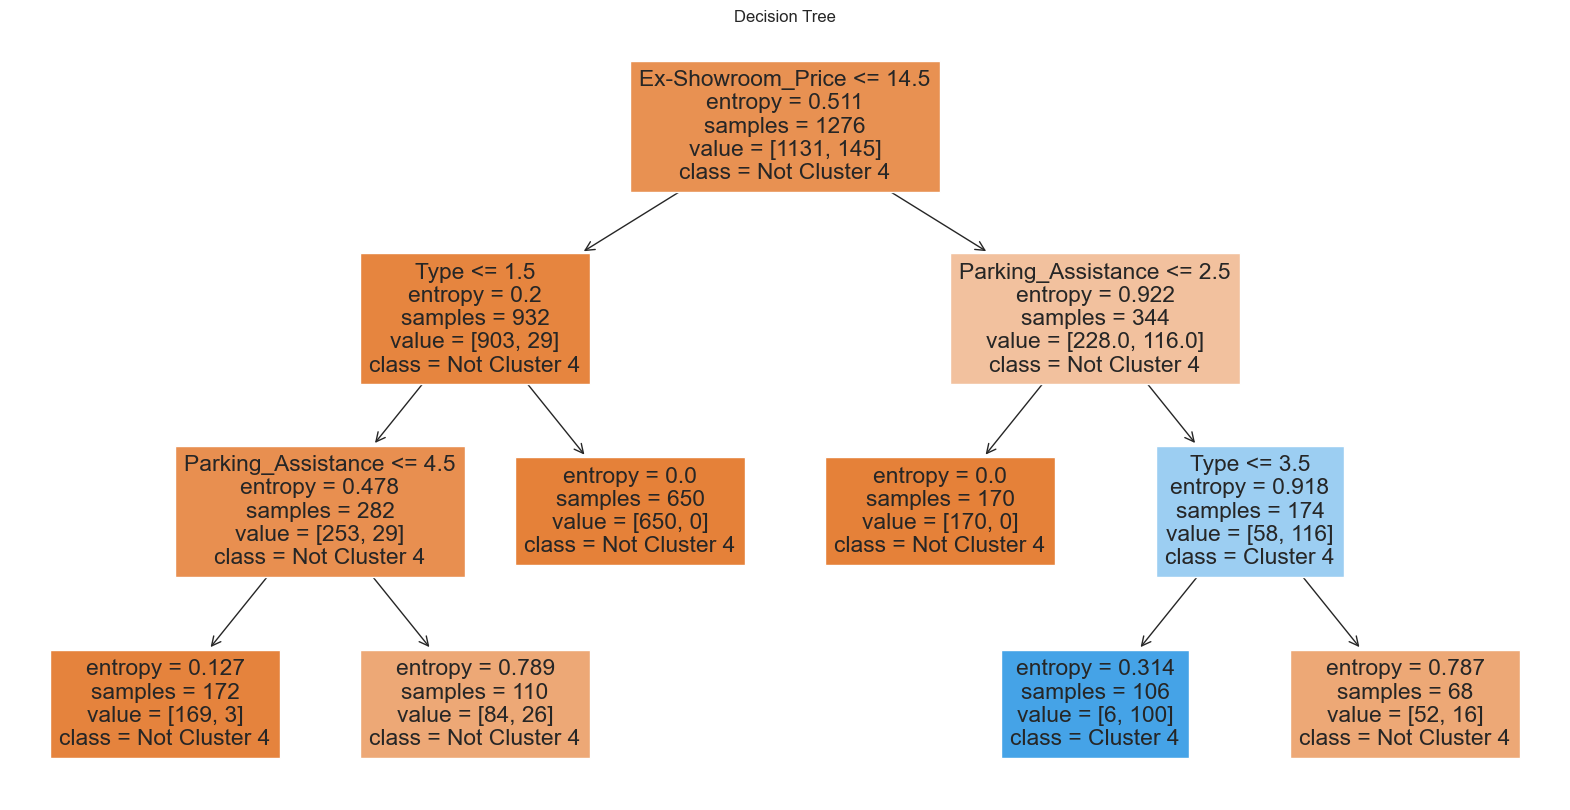

In [46]:
for i in range(0,kl.elbow):

    # Define the target and features
    X = fnl_df.drop(columns=["cluster"],axis=1)
    y = (kmeans.labels_ == i).astype(int)  # Target variable

    # Convert categorical variables to dummy variables
    X = pd.get_dummies(X, drop_first=True)

    # Create and fit the decision tree classifier with max depth of 3
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Set max_depth to 3
    tree.fit(X, y)

    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=X.columns, class_names=[f'Not Cluster {i}', f'Cluster {i}'],filled=True)
    plt.title('Decision Tree')
    plt.show()


## Segment Profiling

In [47]:
# Feature combinations list
feature_combinations = [
    ('Ex-Showroom_Price', 'Type', 'Parking_Assistance'),
    ('Power_Steering', 'Instrument_Console', 'Length'),
    ('Audiosystem',  'Number_of_Airbags', 'Seat_Height_Adjustment'),
    ('Audiosystem', 'Seat_Height_Adjustment', 'Height'),
    ('Parking_Assistance', 'Number_of_Airbags', 'Width')
]

# Group by 'cluster' and calculate the mean for each feature
median_df = fnl_df.groupby('cluster').median().reset_index()

# Define a consistent color map for the clusters
cluster_color_map = {
    '0': 'chartreuse',  
    '1': 'turquoise',  
    '2': 'fuchsia',
    '3': 'gainsboro',
    '4': 'mediumpurple'
}


# Loop over feature combinations and create 3D scatter plots
for combination in feature_combinations:
    x_feature, y_feature, z_feature = combination
    
    # Create 3D scatter plot for all points without legend
    fig = px.scatter_3d(fnl_df, 
                        x=x_feature, 
                        y=y_feature, 
                        z=z_feature,
                        color=fnl_df['cluster'].astype(str),  # Color based on cluster
                        title=f'{x_feature} vs {y_feature} vs {z_feature} (All Points & Cluster Means)',
                        labels={x_feature: x_feature, y_feature: y_feature, z_feature: z_feature},
                        opacity=0.3,
                        category_orders={'cluster': ['0', '1', '2','3','4']},
                        color_discrete_map=cluster_color_map)  # Apply the color map to individual points
    
    # Remove legend for the first scatter plot (individual points)
    fig.update_traces(showlegend=False,marker=dict(size=5))
    
    # Add the mean values as a separate trace (with larger, distinct markers)
    fig_mean = px.scatter_3d(median_df, 
                             x=x_feature, 
                             y=y_feature, 
                             z=z_feature,
                             color=median_df['cluster'].astype(str),  # Color based on cluster
                             opacity=1,
                             category_orders={'cluster': ['0', '1', '2','3','4']},
                             color_discrete_map=cluster_color_map)  # Apply the same color map to mean points
    
    # Update marker size and style for the mean values
    fig_mean.update_traces(marker=dict(size=10, symbol='diamond', opacity=1, 
                                       line=dict(width=2, color='black')))  # Border for diamonds

    # Combine the mean plot with the original plot
    fig.add_traces(fig_mean.data)

    # Save the plot as a PNG file
    fig.write_image(f"Cars_Plots/{x_feature} vs {y_feature} vs {z_feature}.png")
    
    # Show the plot
    fig.show()


In [48]:

# Extract unique features
unique_features = list(set([feature for combo in feature_combinations for feature in combo]))

# Assuming 'fnl_df' contains your data and 'cluster' is the column with cluster labels
# Group by 'cluster' and calculate the mean for the unique features
median_df = fnl_df.groupby('cluster')[unique_features].median().reset_index()

# Set 'cluster' as the index
median_df.set_index('cluster', inplace=True)

# Display the DataFrame
median_df

,Height,Instrument_Console,Audiosystem,Number_of_Airbags,Seat_Height_Adjustment,Power_Steering,Type,Width,Length,Ex-Showroom_Price,Parking_Assistance
cluster,,,,,,,,,,,
0,1541.0,1.0,1.0,2.0,2.0,0.0,4.0,1734.0,3995.0,8.0,5.0
1,1542.5,1.0,6.0,2.0,2.0,0.0,4.0,1701.5,3995.0,7.0,5.0
2,1494.0,1.0,4.0,6.0,1.0,0.0,1.0,1923.0,4861.0,23.0,1.0
3,1640.0,1.0,4.0,2.0,2.0,5.0,4.0,1813.0,4315.0,9.0,5.0
4,1644.0,1.0,4.0,6.0,1.0,0.0,1.0,1855.0,4630.0,26.0,5.0


In [49]:
# Function to map values back to original categories
def map_values_back(df, class_dict):
    data = df.copy()
    for column, mapping in class_dict.items():
        if column in df.columns:
            reverse_mapping = {v: k for k, v in mapping.items()}  # Reverse the mapping
            data[column] = df[column].map(reverse_mapping)  # Map values back
        else:
            continue
    return data

# Apply the function to the DataFrame
df_mapped = map_values_back(median_df, class_dict)

# Display the mapped DataFrame
df_mapped

,Height,Instrument_Console,Audiosystem,Number_of_Airbags,Seat_Height_Adjustment,Power_Steering,Type,Width,Length,Ex-Showroom_Price,Parking_Assistance
cluster,,,,,,,,,,,
0,1541.0,Analog + Digital,CD Player with USB & Aux-in,2.0,Manual Adjustment,Electric Power,Manual,1734.0,3995.0,8.0,Rear sensors with camera
1,1542.5,Analog + Digital,Not on offer,2.0,Manual Adjustment,Electric Power,Manual,1701.5,3995.0,7.0,Rear sensors with camera
2,1494.0,Analog + Digital,CD/MP3/DVD Player with USB & Aux-in,6.0,Electric Adjustment with Memory,Electric Power,Automatic,1923.0,4861.0,23.0,Front and rear sensors with camera
3,1640.0,Analog + Digital,CD/MP3/DVD Player with USB & Aux-in,2.0,Manual Adjustment,Yes,Manual,1813.0,4315.0,9.0,Rear sensors with camera
4,1644.0,Analog + Digital,CD/MP3/DVD Player with USB & Aux-in,6.0,Electric Adjustment with Memory,Electric Power,Automatic,1855.0,4630.0,26.0,Rear sensors with camera


### Conclusion

| **Cluster Number** | **Cluster Name**                     | **Describing Features**                                                                                                                                             |
|--------------------|--------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0                  | Basic Compact SUV Cluster            | Compact height, Analog + Digital console, Basic audio system (CD Player with USB & Aux-in), 2 airbags, Manual seat adjustment, Electric power steering, Manual transmission, Standard width, Affordable price range, Rear sensors with camera. |
| 1                  | Budget Compact SUV Cluster           | Compact height, Analog + Digital console, No audio system, 2 airbags, Manual seat adjustment, Electric power steering, Manual transmission, Slightly narrower width, Lower price range, Rear sensors with camera. |
| 2                  | Premium Sedan Cluster                | Lower height, Analog + Digital console, Advanced audio system (CD/MP3/DVD Player with USB & Aux-in), 6 airbags, Electric seat adjustment with memory, Electric power steering, Automatic transmission, Wider body, Higher price range, Front and rear sensors with camera. |
| 3                  | Mid-Range SUV Cluster                | Taller height, Analog + Digital console, Advanced audio system, 2 airbags, Manual seat adjustment, Power steering, Manual transmission, Moderate width, Mid-range price, Rear sensors with camera. |
| 4                  | Luxury SUV Cluster                   | Taller height, Analog + Digital console, Advanced audio system, 6 airbags, Electric seat adjustment with memory, Electric power steering, Automatic transmission, Wider body, Premium price range, Rear sensors with camera. |